In [2]:
import numpy as np
import matplotlib.pyplot as plt
from molecule import CaOH, CaH, mu_N, gI
from scipy.constants import h, k
%matplotlib inline

import qls
import utils as ut
import bayesian as bay

### Experimental Imperfections

In this notebook I want to discuss the presence of experimental imperfections to the model. <br>
The goal here is to find some metrics that allow us to make a comparison with the exact-case scenario. <br>
To begin with, I will start displaying the results of the spectrum of the molecules

## CaOH

BOTH frequency and Rabi Rate : Gaussian - 1,2,5,10%

Applied on Pumping + Spectrum

In [ ]:
lists_percentage = [0.01, 0.02, 0.05, 0.1]

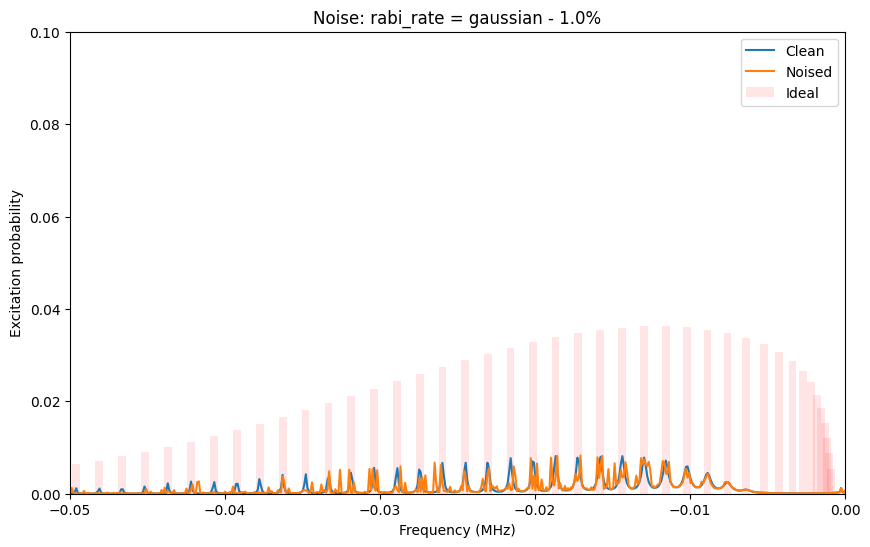

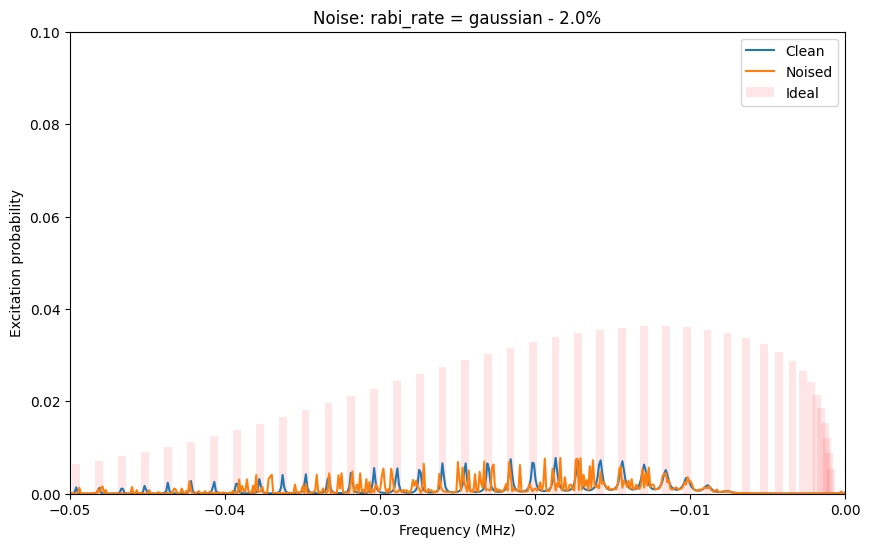

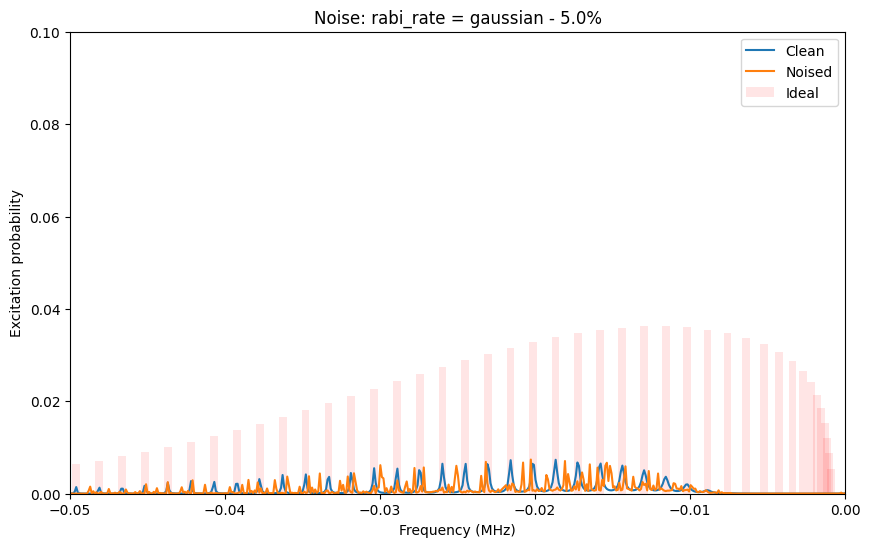

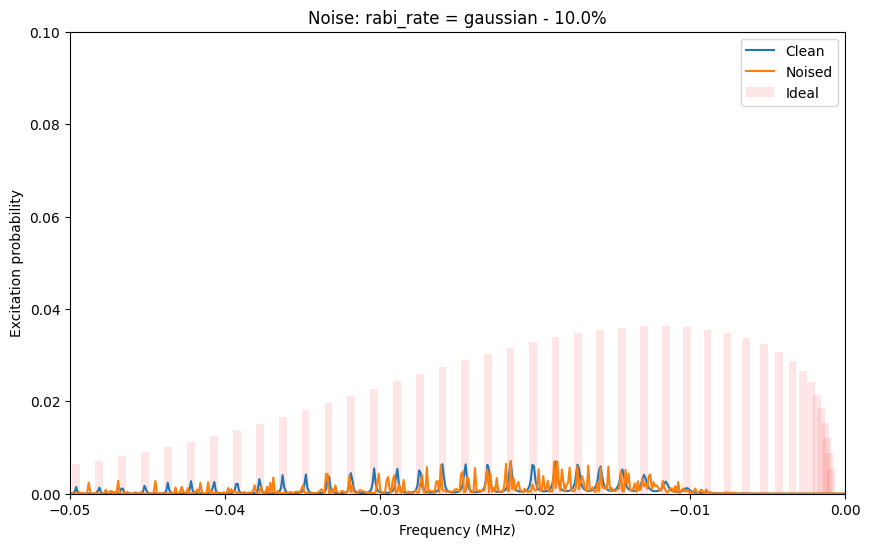

In [36]:
b_field_gauss = 3.27
j_max = 50
    
# mo1 = CaH.create_molecule_data(b_field_gauss=b_field_gauss, j_max=j_max)
mo1 = CaOH.create_molecule_data(b_field_gauss=b_field_gauss, j_max=j_max)
mo2 = CaOH.create_molecule_data(b_field_gauss=b_field_gauss, j_max=j_max)
    
temperature = 300
states1 = qls.States(mo1, temperature)
states2 = qls.States(mo2, temperature)
    
signature_transitions = np.array([mo1.transition_df.loc[mo1.transition_df["j"]==j].iloc[0]["energy_diff"] * 1e-3 for j in range(1, mo1.j_max+1)])
    

for perc in lists_percentage:
    
    noise_params = {
        "frequency": {"type": "gaussian", "level": perc},
        "rabi_rate": {"type": "gaussian", "level": perc}
    }
    

    pump_list = {
        'pump_frequency_mhz': 0.00015,
        'num_pumps': 1000,
        'pump_duration_us': 1000.0,
        'pump_rabi_rate_mhz': 2*np.pi*0.005,
        'pump_dephased': True,
        'coherence_time_us': 100,
        'is_minus': True
    }
    
    qls.apply_pumping(molecule = mo1, **pump_list, noise_params = noise_params, seed = None)
    qls.apply_pumping(molecule = mo2, **pump_list, noise_params = None, seed = None)
    
    
    pump_list['pump_frequency_mhz'] = -0.00035
    
    qls.apply_pumping(molecule = mo1, **pump_list, noise_params = noise_params, seed = None)
    qls.apply_pumping(molecule = mo2, **pump_list, noise_params = None, seed = None)
    
    
    spectrum_list = {
        'duration_us': 5000,
        'rabi_rate_mhz': 2*np.pi*0.005,
        'max_frequency_mhz': 0.05,
        'scan_points': 1000,
        'dephased': True,
        'coherence_time_us': 100,
        'is_minus': True
    }
    
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    
    frequencies, exc_probs1_noise = qls.get_spectrum(molecule=mo1,state_distribution=mo1.state_df["state_dist"], **spectrum_list, noise_params=noise_params, seed=None)
    frequencies, exc_probs1_clean = qls.get_spectrum(molecule=mo2,state_distribution=mo1.state_df["state_dist"], **spectrum_list, noise_params=None, seed=None)
    
    ax.plot(frequencies, exc_probs1_clean, label = f"Clean")      # Plot after pumping
    ax.plot(frequencies, exc_probs1_noise, label = f"Noised")      # Plot after pumping
    ax.bar(signature_transitions, states1.j_distribution()[1:], color="red", width=0.0005, alpha=0.1, label = "Ideal")
    
    # ax.axvline(x=-0.002, color='black', linestyle='--')
    # ax.axvline(x=-0.006, color='black', linestyle='--', label=f'Pump freq {-0.006*(1e3)} kHz, {-0.002*(1e3)} kHz')
    ax.legend()
    ax.set_xlabel("Frequency (MHz)")
    ax.set_ylabel("Excitation probability")
    
    rabi_rate_noise_type = noise_params["rabi_rate"]["type"]
    rabi_rate_noise_level = noise_params["rabi_rate"]["level"]
    
    # Setting the title dynamically with the extracted values
    ax.set_title(f"Noise: rabi_rate = {rabi_rate_noise_type} - {rabi_rate_noise_level*100}%")

    a_lim = -spectrum_list['max_frequency_mhz']
    b_lim = 0
    ax.set_xlim([a_lim, b_lim])
    ax.set_ylim([0, 0.1])
    
    plt.show()
    

## CaH

Frequency: Gaussian - 1,2,5,10%

Applied on Pumping + Spectrum

In [18]:
lists_percentage = [0.01, 0.02, 0.05, 0.1]

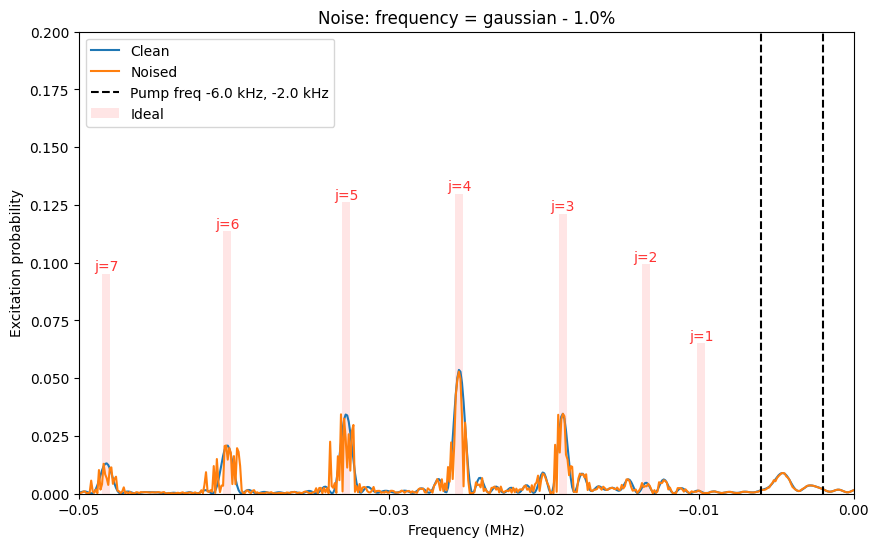

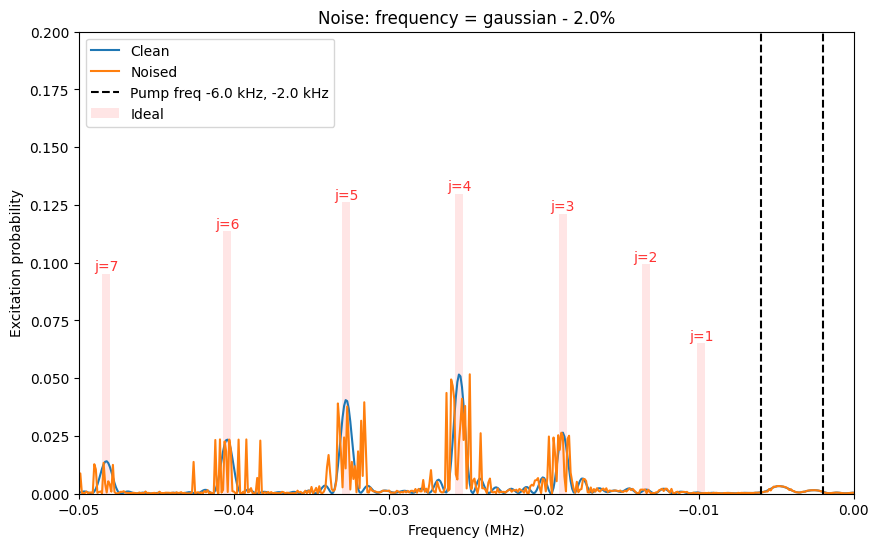

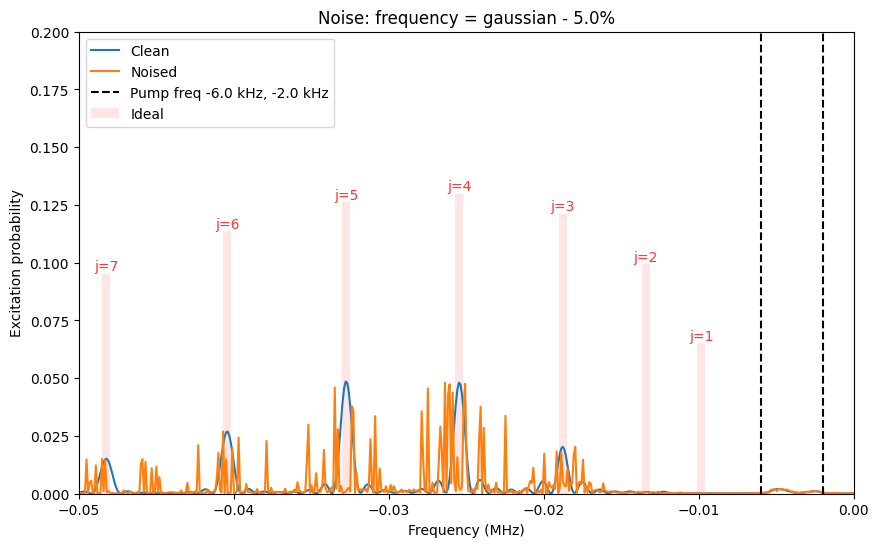

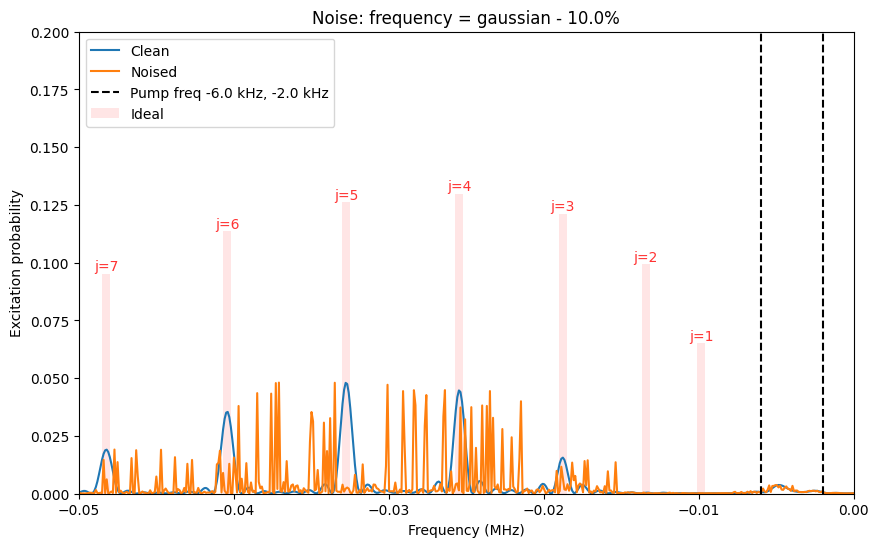

In [19]:
gj_list: list[float] = [-1.35, -1.35, -1.35, -1.34, -1.34, -1.34, -1.34, -1.34, -1.33, -1.33, -1.33, -1.32, -1.32, -1.31, -1.31]
    
cij_list: list[float] = [8.27, 8.26, 8.26, 8.26, 8.26, 8.25, 8.25, 8.24, 8.24, 8.23, 8.22, 8.21, 8.20, 8.19, 8.18]
    
b_field_gauss = 3.6
j_max = 14
    
# mo1 = CaH.create_molecule_data(b_field_gauss=b_field_gauss, j_max=j_max)
mo1 = CaH.create_molecule_data(b_field_gauss=b_field_gauss, j_max=j_max, gj_list = gj_list, cij_list = cij_list)
mo2 = CaH.create_molecule_data(b_field_gauss=b_field_gauss, j_max=j_max, gj_list = gj_list, cij_list = cij_list)
    
temperature = 300
states1 = qls.States(mo1, temperature)
states2 = qls.States(mo2, temperature)
    
signature_transitions = np.array([mo1.transition_df.loc[mo1.transition_df["j"]==j].iloc[0]["energy_diff"] * 1e-3 for j in range(1, mo1.j_max+1)])
    


for perc in lists_percentage:
    
    noise_params = {
        "frequency": {"type": "gaussian", "level": perc}
        # "rabi_rate": {"type": "gaussian", "level": 0.02}
    }
    

    pump_list = {
        'pump_frequency_mhz': -0.002,
        'num_pumps': 200,
        'pump_duration_us': 1000.0,
        'pump_rabi_rate_mhz': 2*np.pi*0.004,
        'pump_dephased': True,
        'coherence_time_us': 100,
        'is_minus': True
    }
    
    qls.apply_pumping(molecule = mo1, **pump_list, noise_params = noise_params, seed = None)
    qls.apply_pumping(molecule = mo2, **pump_list, noise_params = None, seed = None)
    
    
    pump_list['pump_frequency_mhz'] = -0.006
    
    qls.apply_pumping(molecule = mo1, **pump_list, noise_params = noise_params, seed = None)
    qls.apply_pumping(molecule = mo2, **pump_list, noise_params = None, seed = None)
    
    
    spectrum_list = {
        'duration_us': 1000,
        'rabi_rate_mhz': 2*np.pi*0.005,
        'max_frequency_mhz': 0.05,
        'scan_points': 1000,
        'dephased': False,
        'coherence_time_us': 100,
        'is_minus': True
    }
    
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    
    frequencies, exc_probs1_noise = qls.get_spectrum(molecule=mo1,state_distribution=mo1.state_df["state_dist"], **spectrum_list, noise_params=noise_params, seed=None)
    frequencies, exc_probs1_clean = qls.get_spectrum(molecule=mo2,state_distribution=mo1.state_df["state_dist"], **spectrum_list, noise_params=None, seed=None)
    
    ax.plot(frequencies, exc_probs1_clean, label = f"Clean")      # Plot after pumping
    ax.plot(frequencies, exc_probs1_noise, label = f"Noised")      # Plot after pumping
    ax.bar(signature_transitions, states1.j_distribution()[1:], color="red", width=0.0005, alpha=0.1, label = "Ideal")
    ax.axvline(x=-0.002, color='black', linestyle='--')
    ax.axvline(x=-0.006, color='black', linestyle='--', label=f'Pump freq {-0.006*(1e3)} kHz, {-0.002*(1e3)} kHz')
    ax.legend()
    ax.set_xlabel("Frequency (MHz)")
    ax.set_ylabel("Excitation probability")
    
    frequency_noise_type = noise_params["frequency"]["type"]
    frequency_noise_level = noise_params["frequency"]["level"]
    
    # Setting the title dynamically with the extracted values
    ax.set_title(f"Noise: frequency = {frequency_noise_type} - {frequency_noise_level*100}%")

    a_lim = -spectrum_list['max_frequency_mhz']
    b_lim = 0
    ax.set_xlim([a_lim, b_lim])
    ax.set_ylim([0, 0.2])
    
    for i in range(j_max):
        if signature_transitions[i] >= a_lim and signature_transitions[i] <= b_lim:
            ax.text(signature_transitions[i], states1.j_distribution()[i+1], f"j={i+1}", ha='center', va='bottom', color='red', alpha=0.8)
    
    plt.show()
    

Frequency: Uniform - 1,2,5,10%

Applied on Pumping + Spectrum

In [17]:
lists_percentage = [0.01, 0.02, 0.05, 0.1]

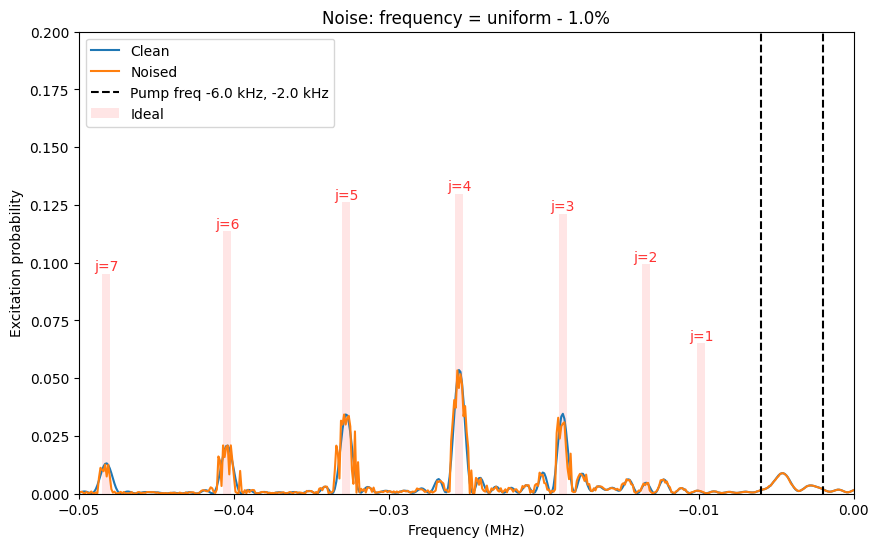

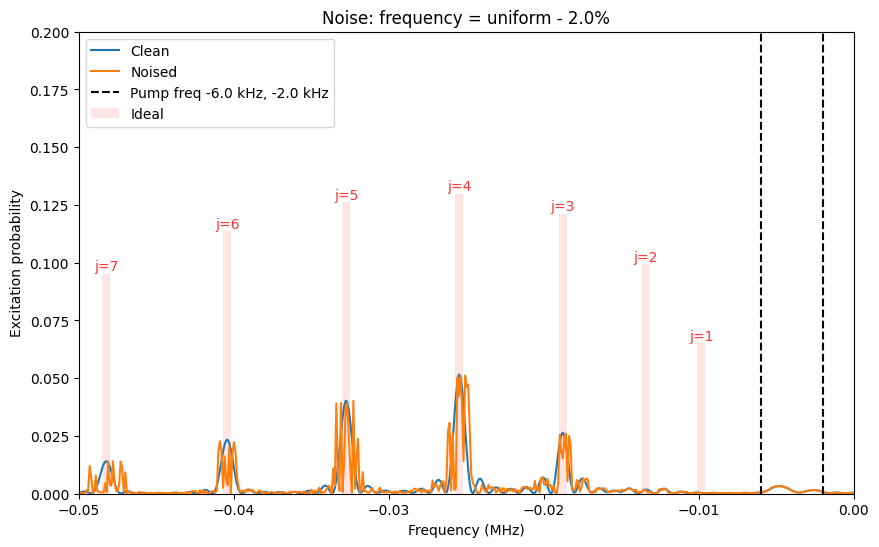

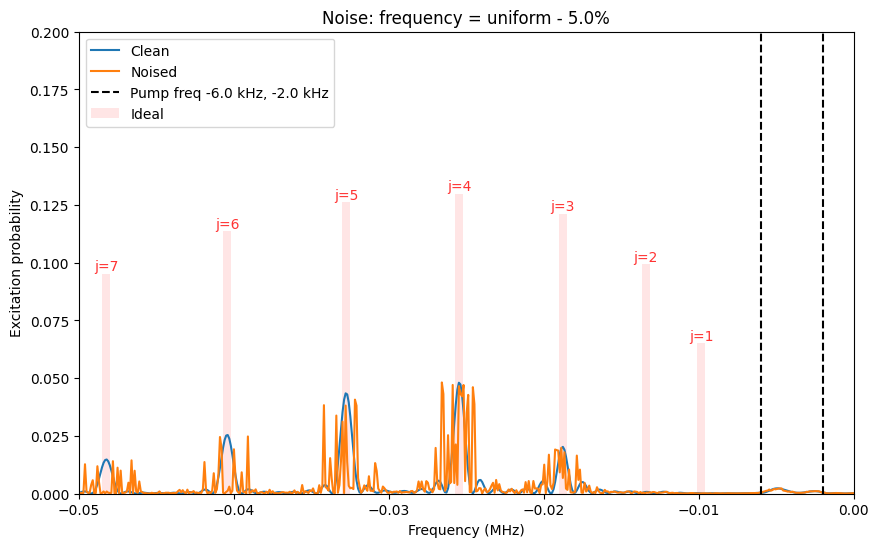

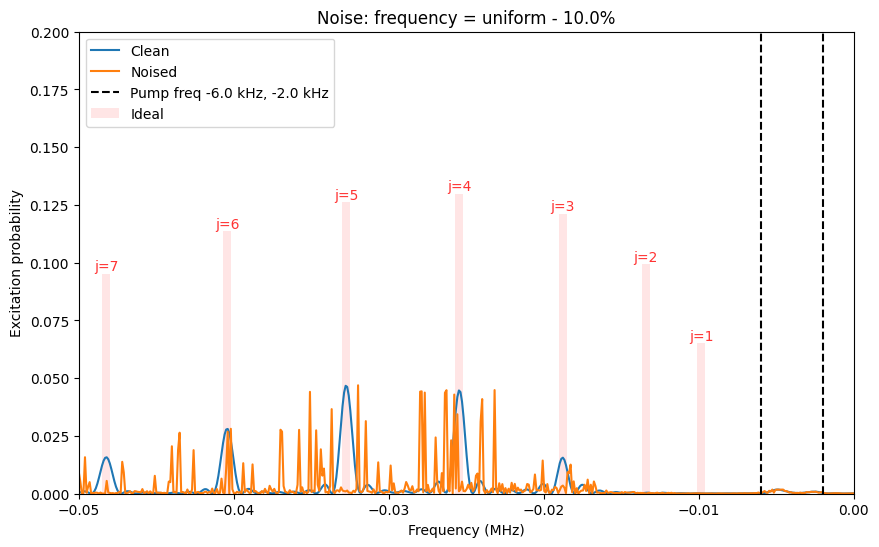

In [20]:
gj_list: list[float] = [-1.35, -1.35, -1.35, -1.34, -1.34, -1.34, -1.34, -1.34, -1.33, -1.33, -1.33, -1.32, -1.32, -1.31, -1.31]
    
cij_list: list[float] = [8.27, 8.26, 8.26, 8.26, 8.26, 8.25, 8.25, 8.24, 8.24, 8.23, 8.22, 8.21, 8.20, 8.19, 8.18]
    
b_field_gauss = 3.6
j_max = 14
    
# mo1 = CaH.create_molecule_data(b_field_gauss=b_field_gauss, j_max=j_max)
mo1 = CaH.create_molecule_data(b_field_gauss=b_field_gauss, j_max=j_max, gj_list = gj_list, cij_list = cij_list)
mo2 = CaH.create_molecule_data(b_field_gauss=b_field_gauss, j_max=j_max, gj_list = gj_list, cij_list = cij_list)
    
temperature = 300
states1 = qls.States(mo1, temperature)
states2 = qls.States(mo2, temperature)
    
signature_transitions = np.array([mo1.transition_df.loc[mo1.transition_df["j"]==j].iloc[0]["energy_diff"] * 1e-3 for j in range(1, mo1.j_max+1)])
    


for perc in lists_percentage:
    
    noise_params = {
        "frequency": {"type": "uniform", "level": perc}
        # "rabi_rate": {"type": "gaussian", "level": 0.02}
    }
    

    pump_list = {
        'pump_frequency_mhz': -0.002,
        'num_pumps': 200,
        'pump_duration_us': 1000.0,
        'pump_rabi_rate_mhz': 2*np.pi*0.004,
        'pump_dephased': True,
        'coherence_time_us': 100,
        'is_minus': True
    }
    
    qls.apply_pumping(molecule = mo1, **pump_list, noise_params = noise_params, seed = None)
    qls.apply_pumping(molecule = mo2, **pump_list, noise_params = None, seed = None)
    
    
    pump_list['pump_frequency_mhz'] = -0.006
    
    qls.apply_pumping(molecule = mo1, **pump_list, noise_params = noise_params, seed = None)
    qls.apply_pumping(molecule = mo2, **pump_list, noise_params = None, seed = None)
    
    
    spectrum_list = {
        'duration_us': 1000,
        'rabi_rate_mhz': 2*np.pi*0.005,
        'max_frequency_mhz': 0.05,
        'scan_points': 1000,
        'dephased': False,
        'coherence_time_us': 100,
        'is_minus': True
    }
    
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    
    frequencies, exc_probs1_noise = qls.get_spectrum(molecule=mo1,state_distribution=mo1.state_df["state_dist"], **spectrum_list, noise_params=noise_params, seed=None)
    frequencies, exc_probs1_clean = qls.get_spectrum(molecule=mo2,state_distribution=mo1.state_df["state_dist"], **spectrum_list, noise_params=None, seed=None)
    
    ax.plot(frequencies, exc_probs1_clean, label = f"Clean")      # Plot after pumping
    ax.plot(frequencies, exc_probs1_noise, label = f"Noised")      # Plot after pumping
    ax.bar(signature_transitions, states1.j_distribution()[1:], color="red", width=0.0005, alpha=0.1, label = "Ideal")
    ax.axvline(x=-0.002, color='black', linestyle='--')
    ax.axvline(x=-0.006, color='black', linestyle='--', label=f'Pump freq {-0.006*(1e3)} kHz, {-0.002*(1e3)} kHz')
    ax.legend()
    ax.set_xlabel("Frequency (MHz)")
    ax.set_ylabel("Excitation probability")
    
    frequency_noise_type = noise_params["frequency"]["type"]
    frequency_noise_level = noise_params["frequency"]["level"]
    
    # Setting the title dynamically with the extracted values
    ax.set_title(f"Noise: frequency = {frequency_noise_type} - {frequency_noise_level*100}%")

    a_lim = -spectrum_list['max_frequency_mhz']
    b_lim = 0
    ax.set_xlim([a_lim, b_lim])
    ax.set_ylim([0, 0.2])
    
    for i in range(j_max):
        if signature_transitions[i] >= a_lim and signature_transitions[i] <= b_lim:
            ax.text(signature_transitions[i], states1.j_distribution()[i+1], f"j={i+1}", ha='center', va='bottom', color='red', alpha=0.8)
    
    plt.show()
    

Rabi Rate : Gaussian - 1,2,5,10%

Applied on Pumping + Spectrum

In [21]:
lists_percentage = [0.01, 0.02, 0.05, 0.1]

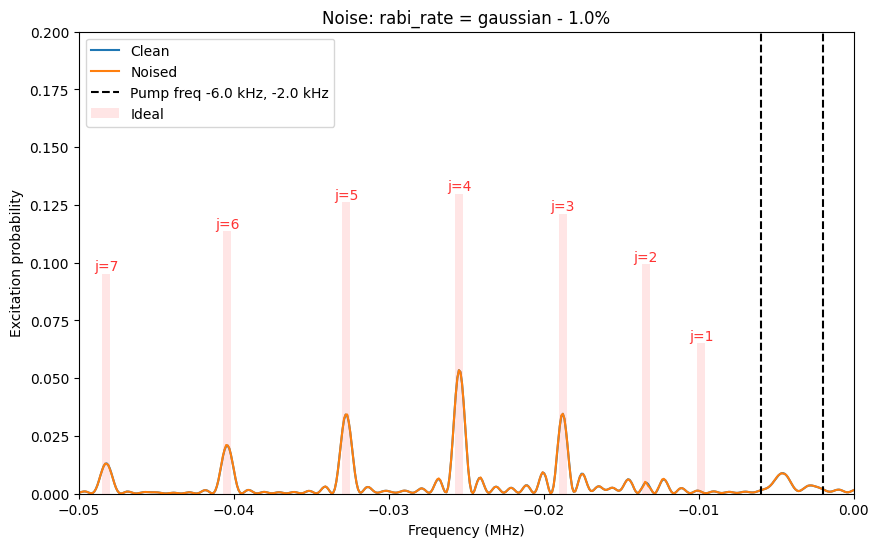

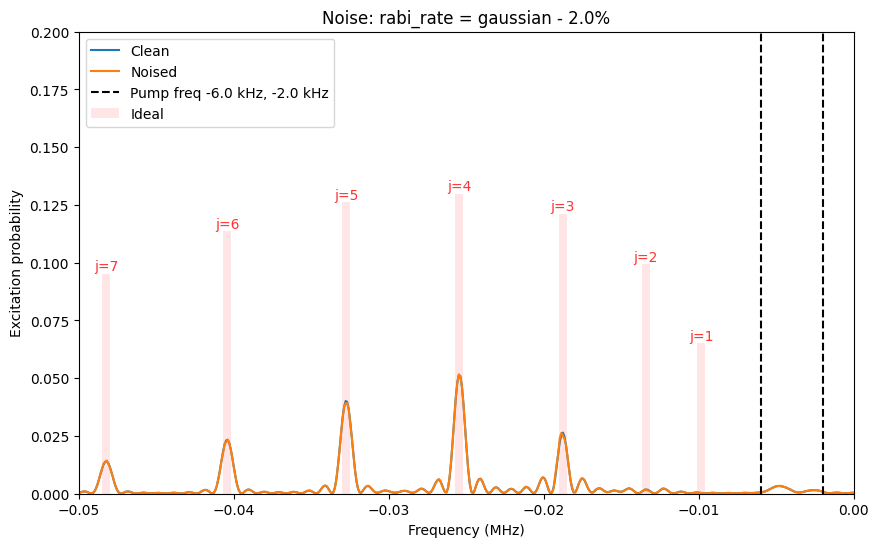

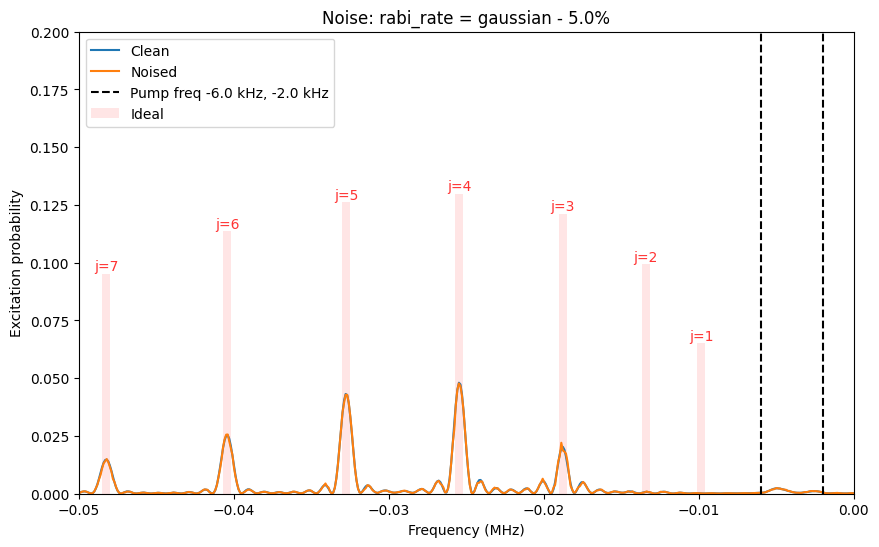

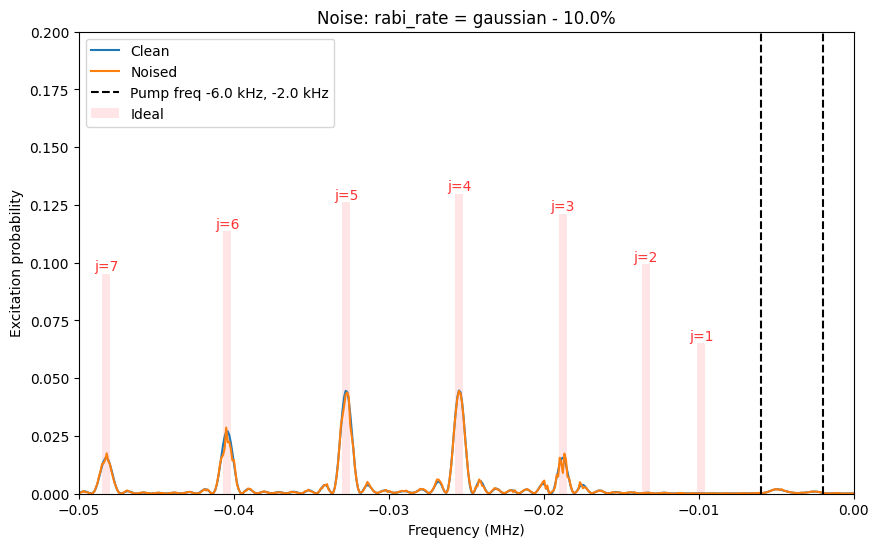

In [25]:
gj_list: list[float] = [-1.35, -1.35, -1.35, -1.34, -1.34, -1.34, -1.34, -1.34, -1.33, -1.33, -1.33, -1.32, -1.32, -1.31, -1.31]
    
cij_list: list[float] = [8.27, 8.26, 8.26, 8.26, 8.26, 8.25, 8.25, 8.24, 8.24, 8.23, 8.22, 8.21, 8.20, 8.19, 8.18]
    
b_field_gauss = 3.6
j_max = 14
    
# mo1 = CaH.create_molecule_data(b_field_gauss=b_field_gauss, j_max=j_max)
mo1 = CaH.create_molecule_data(b_field_gauss=b_field_gauss, j_max=j_max, gj_list = gj_list, cij_list = cij_list)
mo2 = CaH.create_molecule_data(b_field_gauss=b_field_gauss, j_max=j_max, gj_list = gj_list, cij_list = cij_list)
    
temperature = 300
states1 = qls.States(mo1, temperature)
states2 = qls.States(mo2, temperature)
    
signature_transitions = np.array([mo1.transition_df.loc[mo1.transition_df["j"]==j].iloc[0]["energy_diff"] * 1e-3 for j in range(1, mo1.j_max+1)])
    


for perc in lists_percentage:
    
    noise_params = {
        # "frequency": {"type": "uniform", "level": perc}
        "rabi_rate": {"type": "gaussian", "level": perc}
    }
    

    pump_list = {
        'pump_frequency_mhz': -0.002,
        'num_pumps': 200,
        'pump_duration_us': 1000.0,
        'pump_rabi_rate_mhz': 2*np.pi*0.004,
        'pump_dephased': True,
        'coherence_time_us': 100,
        'is_minus': True
    }
    
    qls.apply_pumping(molecule = mo1, **pump_list, noise_params = noise_params, seed = None)
    qls.apply_pumping(molecule = mo2, **pump_list, noise_params = None, seed = None)
    
    
    pump_list['pump_frequency_mhz'] = -0.006
    
    qls.apply_pumping(molecule = mo1, **pump_list, noise_params = noise_params, seed = None)
    qls.apply_pumping(molecule = mo2, **pump_list, noise_params = None, seed = None)
    
    
    spectrum_list = {
        'duration_us': 1000,
        'rabi_rate_mhz': 2*np.pi*0.005,
        'max_frequency_mhz': 0.05,
        'scan_points': 1000,
        'dephased': False,
        'coherence_time_us': 100,
        'is_minus': True
    }
    
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    
    frequencies, exc_probs1_noise = qls.get_spectrum(molecule=mo1,state_distribution=mo1.state_df["state_dist"], **spectrum_list, noise_params=noise_params, seed=None)
    frequencies, exc_probs1_clean = qls.get_spectrum(molecule=mo2,state_distribution=mo1.state_df["state_dist"], **spectrum_list, noise_params=None, seed=None)
    
    ax.plot(frequencies, exc_probs1_clean, label = f"Clean")      # Plot after pumping
    ax.plot(frequencies, exc_probs1_noise, label = f"Noised")      # Plot after pumping
    ax.bar(signature_transitions, states1.j_distribution()[1:], color="red", width=0.0005, alpha=0.1, label = "Ideal")
    ax.axvline(x=-0.002, color='black', linestyle='--')
    ax.axvline(x=-0.006, color='black', linestyle='--', label=f'Pump freq {-0.006*(1e3)} kHz, {-0.002*(1e3)} kHz')
    ax.legend()
    ax.set_xlabel("Frequency (MHz)")
    ax.set_ylabel("Excitation probability")
    
    rabi_rate_noise_type = noise_params["rabi_rate"]["type"]
    rabi_rate_noise_level = noise_params["rabi_rate"]["level"]
    
    # Setting the title dynamically with the extracted values
    ax.set_title(f"Noise: rabi_rate = {rabi_rate_noise_type} - {rabi_rate_noise_level*100}%")

    a_lim = -spectrum_list['max_frequency_mhz']
    b_lim = 0
    ax.set_xlim([a_lim, b_lim])
    ax.set_ylim([0, 0.2])
    
    for i in range(j_max):
        if signature_transitions[i] >= a_lim and signature_transitions[i] <= b_lim:
            ax.text(signature_transitions[i], states1.j_distribution()[i+1], f"j={i+1}", ha='center', va='bottom', color='red', alpha=0.8)
    
    plt.show()
    

Rabi Rate : Uniform - 1,2,5,10%

Applied on Pumping + Spectrum

In [26]:
lists_percentage = [0.01, 0.02, 0.05, 0.1]

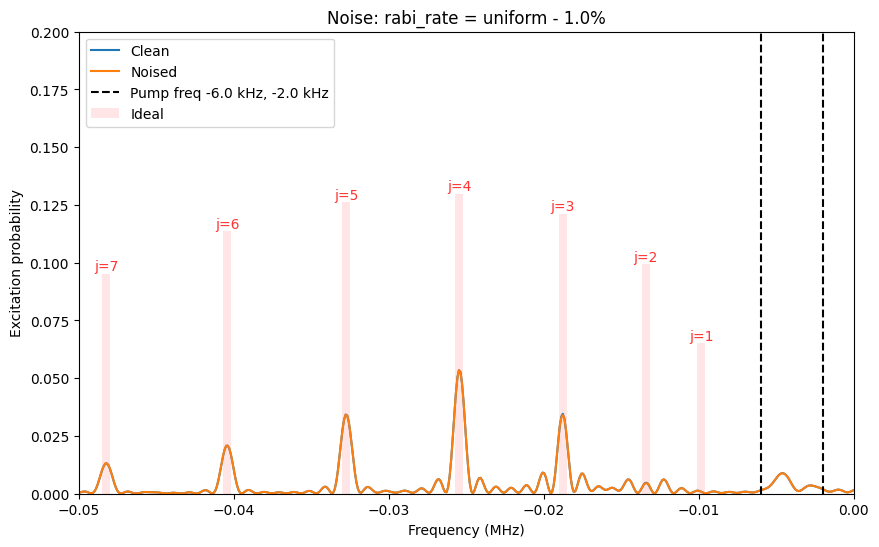

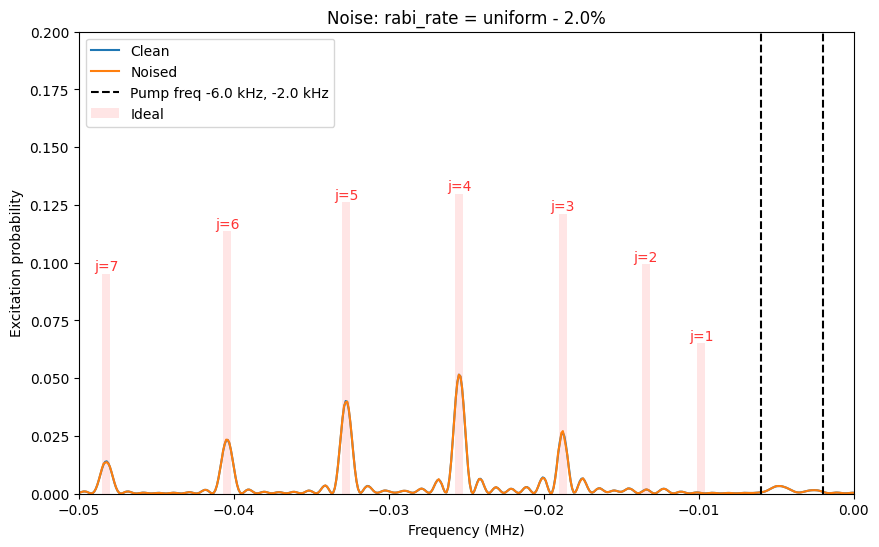

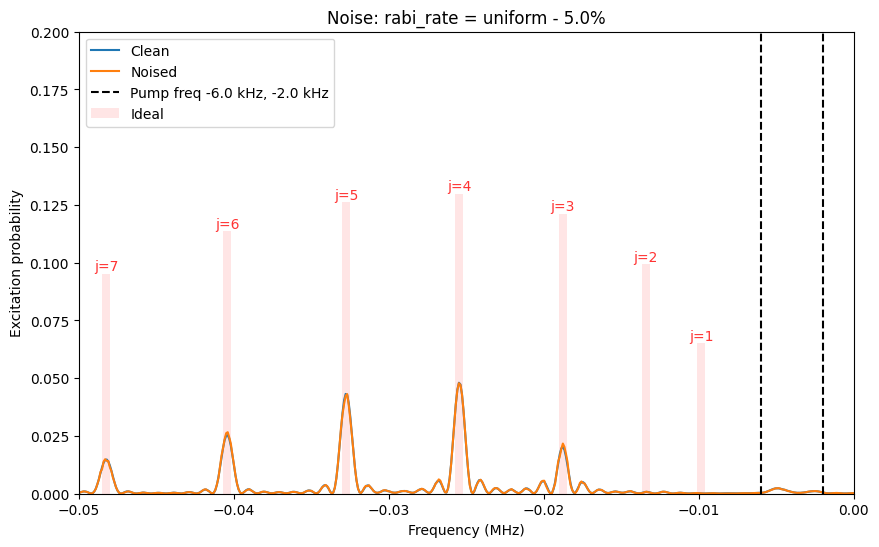

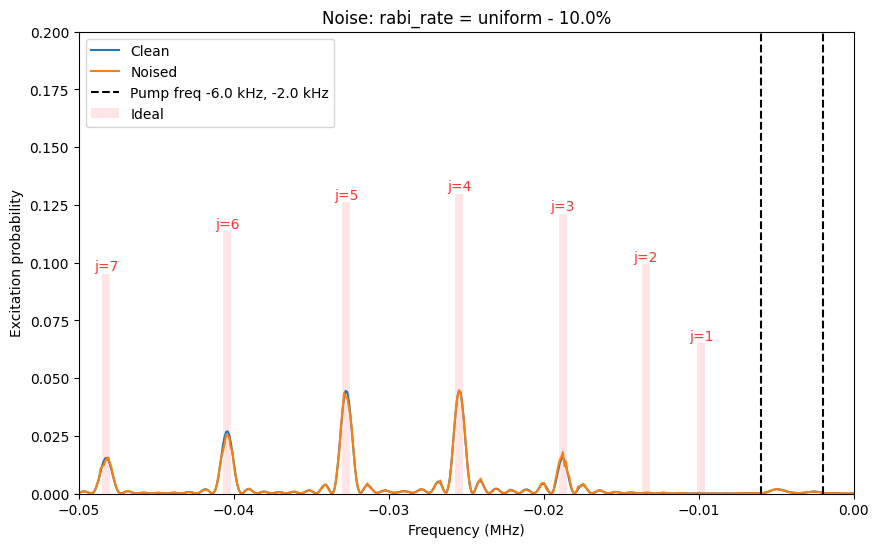

In [27]:
gj_list: list[float] = [-1.35, -1.35, -1.35, -1.34, -1.34, -1.34, -1.34, -1.34, -1.33, -1.33, -1.33, -1.32, -1.32, -1.31, -1.31]
    
cij_list: list[float] = [8.27, 8.26, 8.26, 8.26, 8.26, 8.25, 8.25, 8.24, 8.24, 8.23, 8.22, 8.21, 8.20, 8.19, 8.18]
    
b_field_gauss = 3.6
j_max = 14
    
# mo1 = CaH.create_molecule_data(b_field_gauss=b_field_gauss, j_max=j_max)
mo1 = CaH.create_molecule_data(b_field_gauss=b_field_gauss, j_max=j_max, gj_list = gj_list, cij_list = cij_list)
mo2 = CaH.create_molecule_data(b_field_gauss=b_field_gauss, j_max=j_max, gj_list = gj_list, cij_list = cij_list)
    
temperature = 300
states1 = qls.States(mo1, temperature)
states2 = qls.States(mo2, temperature)
    
signature_transitions = np.array([mo1.transition_df.loc[mo1.transition_df["j"]==j].iloc[0]["energy_diff"] * 1e-3 for j in range(1, mo1.j_max+1)])
    


for perc in lists_percentage:
    
    noise_params = {
        # "frequency": {"type": "uniform", "level": perc}
        "rabi_rate": {"type": "uniform", "level": perc}
    }
    

    pump_list = {
        'pump_frequency_mhz': -0.002,
        'num_pumps': 200,
        'pump_duration_us': 1000.0,
        'pump_rabi_rate_mhz': 2*np.pi*0.004,
        'pump_dephased': True,
        'coherence_time_us': 100,
        'is_minus': True
    }
    
    qls.apply_pumping(molecule = mo1, **pump_list, noise_params = noise_params, seed = None)
    qls.apply_pumping(molecule = mo2, **pump_list, noise_params = None, seed = None)
    
    
    pump_list['pump_frequency_mhz'] = -0.006
    
    qls.apply_pumping(molecule = mo1, **pump_list, noise_params = noise_params, seed = None)
    qls.apply_pumping(molecule = mo2, **pump_list, noise_params = None, seed = None)
    
    
    spectrum_list = {
        'duration_us': 1000,
        'rabi_rate_mhz': 2*np.pi*0.005,
        'max_frequency_mhz': 0.05,
        'scan_points': 1000,
        'dephased': False,
        'coherence_time_us': 100,
        'is_minus': True
    }
    
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    
    frequencies, exc_probs1_noise = qls.get_spectrum(molecule=mo1,state_distribution=mo1.state_df["state_dist"], **spectrum_list, noise_params=noise_params, seed=None)
    frequencies, exc_probs1_clean = qls.get_spectrum(molecule=mo2,state_distribution=mo1.state_df["state_dist"], **spectrum_list, noise_params=None, seed=None)
    
    ax.plot(frequencies, exc_probs1_clean, label = f"Clean")      # Plot after pumping
    ax.plot(frequencies, exc_probs1_noise, label = f"Noised")      # Plot after pumping
    ax.bar(signature_transitions, states1.j_distribution()[1:], color="red", width=0.0005, alpha=0.1, label = "Ideal")
    ax.axvline(x=-0.002, color='black', linestyle='--')
    ax.axvline(x=-0.006, color='black', linestyle='--', label=f'Pump freq {-0.006*(1e3)} kHz, {-0.002*(1e3)} kHz')
    ax.legend()
    ax.set_xlabel("Frequency (MHz)")
    ax.set_ylabel("Excitation probability")
    
    rabi_rate_noise_type = noise_params["rabi_rate"]["type"]
    rabi_rate_noise_level = noise_params["rabi_rate"]["level"]
    
    # Setting the title dynamically with the extracted values
    ax.set_title(f"Noise: rabi_rate = {rabi_rate_noise_type} - {rabi_rate_noise_level*100}%")

    a_lim = -spectrum_list['max_frequency_mhz']
    b_lim = 0
    ax.set_xlim([a_lim, b_lim])
    ax.set_ylim([0, 0.2])
    
    for i in range(j_max):
        if signature_transitions[i] >= a_lim and signature_transitions[i] <= b_lim:
            ax.text(signature_transitions[i], states1.j_distribution()[i+1], f"j={i+1}", ha='center', va='bottom', color='red', alpha=0.8)
    
    plt.show()
    

BOTH frequency and Rabi Rate : Gaussian - 1,2,5,10%

Applied on Pumping + Spectrum

In [28]:
lists_percentage = [0.01, 0.02, 0.05, 0.1]

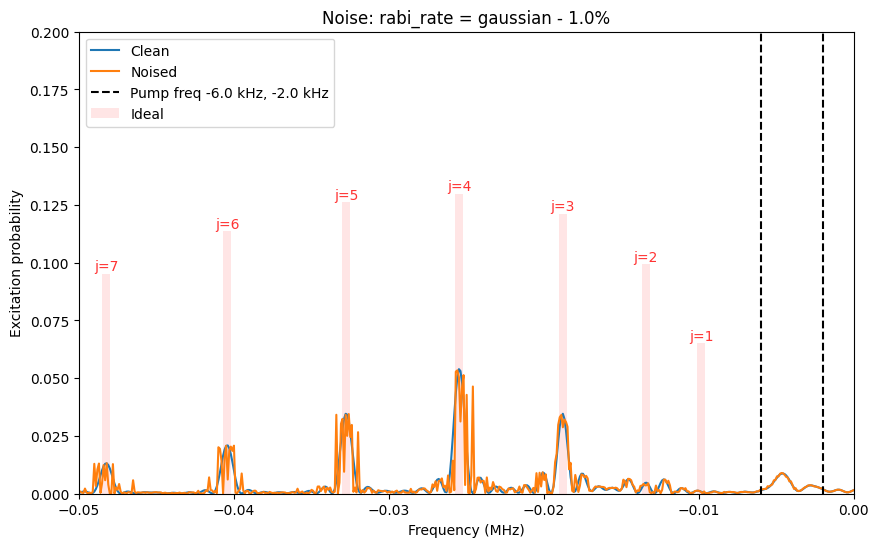

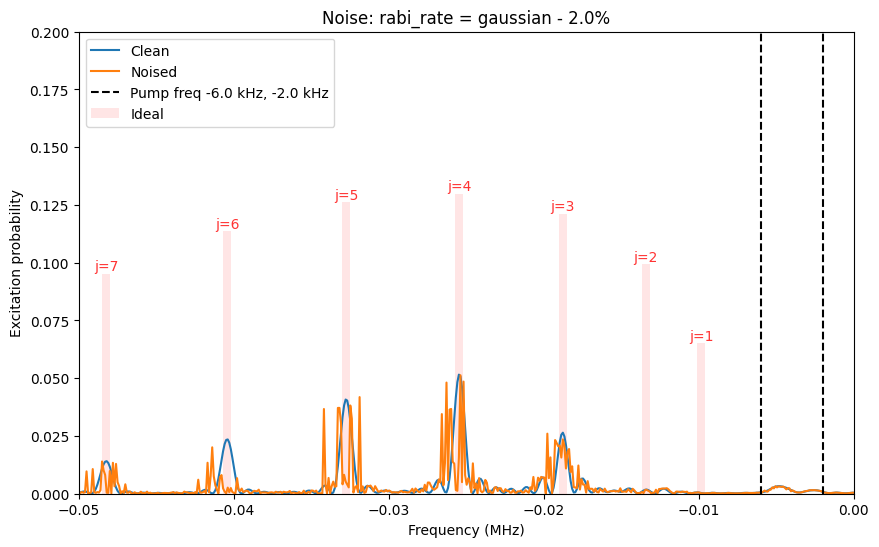

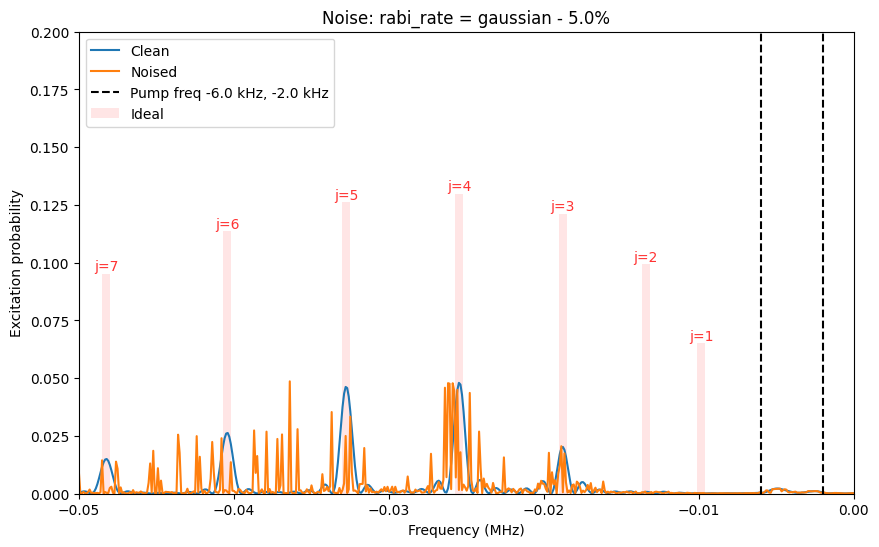

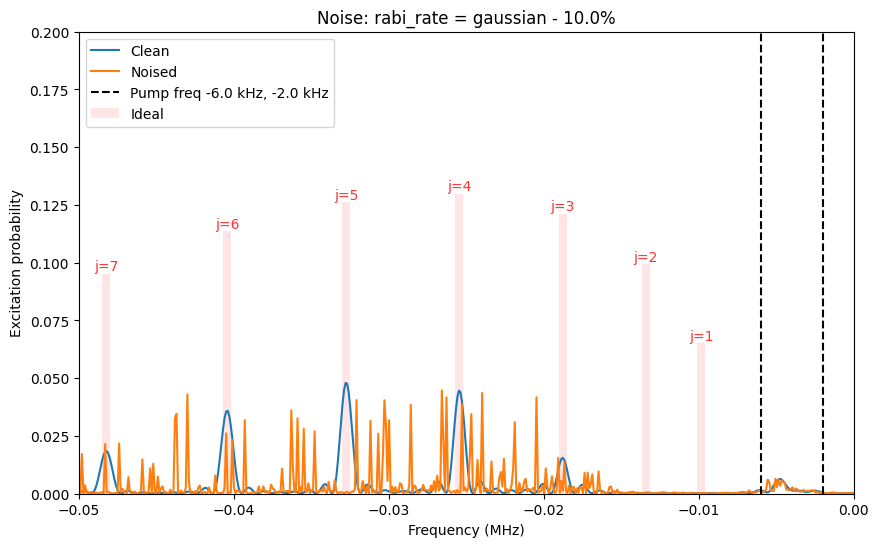

In [33]:
gj_list: list[float] = [-1.35, -1.35, -1.35, -1.34, -1.34, -1.34, -1.34, -1.34, -1.33, -1.33, -1.33, -1.32, -1.32, -1.31, -1.31]
    
cij_list: list[float] = [8.27, 8.26, 8.26, 8.26, 8.26, 8.25, 8.25, 8.24, 8.24, 8.23, 8.22, 8.21, 8.20, 8.19, 8.18]
    
b_field_gauss = 3.6
j_max = 14
    
# mo1 = CaH.create_molecule_data(b_field_gauss=b_field_gauss, j_max=j_max)
mo1 = CaH.create_molecule_data(b_field_gauss=b_field_gauss, j_max=j_max, gj_list = gj_list, cij_list = cij_list)
mo2 = CaH.create_molecule_data(b_field_gauss=b_field_gauss, j_max=j_max, gj_list = gj_list, cij_list = cij_list)
    
temperature = 300
states1 = qls.States(mo1, temperature)
states2 = qls.States(mo2, temperature)
    
signature_transitions = np.array([mo1.transition_df.loc[mo1.transition_df["j"]==j].iloc[0]["energy_diff"] * 1e-3 for j in range(1, mo1.j_max+1)])
    


for perc in lists_percentage:
    
    noise_params = {
        "frequency": {"type": "gaussian", "level": perc},
        "rabi_rate": {"type": "gaussian", "level": perc}
    }
    

    pump_list = {
        'pump_frequency_mhz': -0.002,
        'num_pumps': 200,
        'pump_duration_us': 1000.0,
        'pump_rabi_rate_mhz': 2*np.pi*0.004,
        'pump_dephased': True,
        'coherence_time_us': 100,
        'is_minus': True
    }
    
    qls.apply_pumping(molecule = mo1, **pump_list, noise_params = noise_params, seed = None)
    qls.apply_pumping(molecule = mo2, **pump_list, noise_params = None, seed = None)
    
    
    pump_list['pump_frequency_mhz'] = -0.006
    
    qls.apply_pumping(molecule = mo1, **pump_list, noise_params = noise_params, seed = None)
    qls.apply_pumping(molecule = mo2, **pump_list, noise_params = None, seed = None)
    
    
    spectrum_list = {
        'duration_us': 1000,
        'rabi_rate_mhz': 2*np.pi*0.005,
        'max_frequency_mhz': 0.05,
        'scan_points': 1000,
        'dephased': False,
        'coherence_time_us': 100,
        'is_minus': True
    }
    
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    
    frequencies, exc_probs1_noise = qls.get_spectrum(molecule=mo1,state_distribution=mo1.state_df["state_dist"], **spectrum_list, noise_params=noise_params, seed=None)
    frequencies, exc_probs1_clean = qls.get_spectrum(molecule=mo2,state_distribution=mo1.state_df["state_dist"], **spectrum_list, noise_params=None, seed=None)
    
    ax.plot(frequencies, exc_probs1_clean, label = f"Clean")      # Plot after pumping
    ax.plot(frequencies, exc_probs1_noise, label = f"Noised")      # Plot after pumping
    ax.bar(signature_transitions, states1.j_distribution()[1:], color="red", width=0.0005, alpha=0.1, label = "Ideal")
    ax.axvline(x=-0.002, color='black', linestyle='--')
    ax.axvline(x=-0.006, color='black', linestyle='--', label=f'Pump freq {-0.006*(1e3)} kHz, {-0.002*(1e3)} kHz')
    ax.legend()
    ax.set_xlabel("Frequency (MHz)")
    ax.set_ylabel("Excitation probability")
    
    rabi_rate_noise_type = noise_params["rabi_rate"]["type"]
    rabi_rate_noise_level = noise_params["rabi_rate"]["level"]
    
    # Setting the title dynamically with the extracted values
    ax.set_title(f"Noise: rabi_rate = {rabi_rate_noise_type} - {rabi_rate_noise_level*100}%")

    a_lim = -spectrum_list['max_frequency_mhz']
    b_lim = 0
    ax.set_xlim([a_lim, b_lim])
    ax.set_ylim([0, 0.2])
    
    for i in range(j_max):
        if signature_transitions[i] >= a_lim and signature_transitions[i] <= b_lim:
            ax.text(signature_transitions[i], states1.j_distribution()[i+1], f"j={i+1}", ha='center', va='bottom', color='red', alpha=0.8)
    
    plt.show()
    